In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
df=pd.read_csv('TCS.NS.csv')
df

Date         Open         High          Low        Close  \
0     2013-02-22   725.000000   732.025024   721.150024   727.549988   
1     2013-02-25   726.500000   737.500000   725.750000   736.849976   
2     2013-02-26   733.500000   749.974976   733.000000   748.200012   
3     2013-02-27   747.625000   751.525024   738.650024   741.599976   
4     2013-02-28   743.125000   762.500000   742.625000   758.500000   
...          ...          ...          ...          ...          ...   
2464  2023-02-16  3527.199951  3575.000000  3527.000000  3558.050049   
2465  2023-02-17  3526.149902  3538.899902  3490.000000  3501.149902   
2466  2023-02-20  3502.000000  3522.000000  3475.050049  3487.300049   
2467  2023-02-21  3494.000000  3508.899902  3444.750000  3451.000000   
2468  2023-02-22  3414.949951  3447.000000  3395.000000  3401.550049   

        Adj Close     Volume  
0      589.708862  1310694.0  
1      597.246765  1730030.0  
2      606.446533  2853670.0  
3      601.096863  2556682.0  
4      614.794861  4599424.0  
...           ...        ...  
2464  3558.050049  1618931.0  
2465  3501.149902  1061369.0  
2466  3487.300049  1296082.0  
2467  3451.000000  1139541.0  
2468  3401.550049  1218430.0  

[2469 rows x 7 columns]

In [3]:
df.head()


Date     Open        High         Low       Close   Adj Close  \
0  2013-02-22  725.000  732.025024  721.150024  727.549988  589.708862   
1  2013-02-25  726.500  737.500000  725.750000  736.849976  597.246765   
2  2013-02-26  733.500  749.974976  733.000000  748.200012  606.446533   
3  2013-02-27  747.625  751.525024  738.650024  741.599976  601.096863   
4  2013-02-28  743.125  762.500000  742.625000  758.500000  614.794861   

      Volume  
0  1310694.0  
1  1730030.0  
2  2853670.0  
3  2556682.0  
4  4599424.0

In [4]:
df.shape

(2469, 7)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2469 non-null   object 
 1   Open       2467 non-null   float64
 2   High       2467 non-null   float64
 3   Low        2467 non-null   float64
 4   Close      2467 non-null   float64
 5   Adj Close  2467 non-null   float64
 6   Volume     2467 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.1+ KB


In [6]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  2467.000000  2467.000000  2467.000000  2467.000000  2467.000000   
mean   1909.302876  1928.600574  1888.589800  1908.491528  1760.051270   
std     893.060879   900.275859   884.426285   892.367872   917.257829   
min     682.500000   691.000000   682.500000   684.674988   554.956970   
25%    1223.000000  1234.674988  1211.924988  1221.975036  1057.432861   
50%    1477.000000  1499.800049  1463.275024  1479.650024  1327.199585   
75%    2291.224976  2333.900024  2273.925049  2297.425049  2187.835327   
max    4033.949951  4043.000000  3980.000000  4019.149902  3885.789795   

             Volume  
count  2.467000e+03  
mean   2.724261e+06  
std    2.383317e+06  
min    0.000000e+00  
25%    1.682374e+06  
50%    2.290762e+06  
75%    3.166122e+06  
max    8.806715e+07

In [7]:
df1=df.drop(columns=['Adj Close','Volume','Date'],axis =1)

In [8]:
df1.head()

Open        High         Low       Close
0  725.000  732.025024  721.150024  727.549988
1  726.500  737.500000  725.750000  736.849976
2  733.500  749.974976  733.000000  748.200012
3  747.625  751.525024  738.650024  741.599976
4  743.125  762.500000  742.625000  758.500000

In [9]:
#### checking for na values

In [10]:
df1.isna().sum()

Open     2
High     2
Low      2
Close    2
dtype: int64

In [11]:
df1[df1.isnull().any(axis=1)]

Open  High  Low  Close
266   NaN   NaN  NaN    NaN
495   NaN   NaN  NaN    NaN

In [12]:
##### dropping na values

In [13]:
df2=df1.dropna()

In [14]:
df2.isna().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [15]:
### Visulization

<AxesSubplot:>

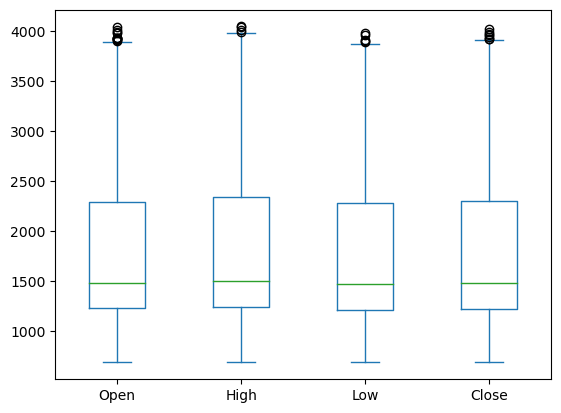

In [16]:
df2.plot(kind='box')

In [17]:
## pairplot

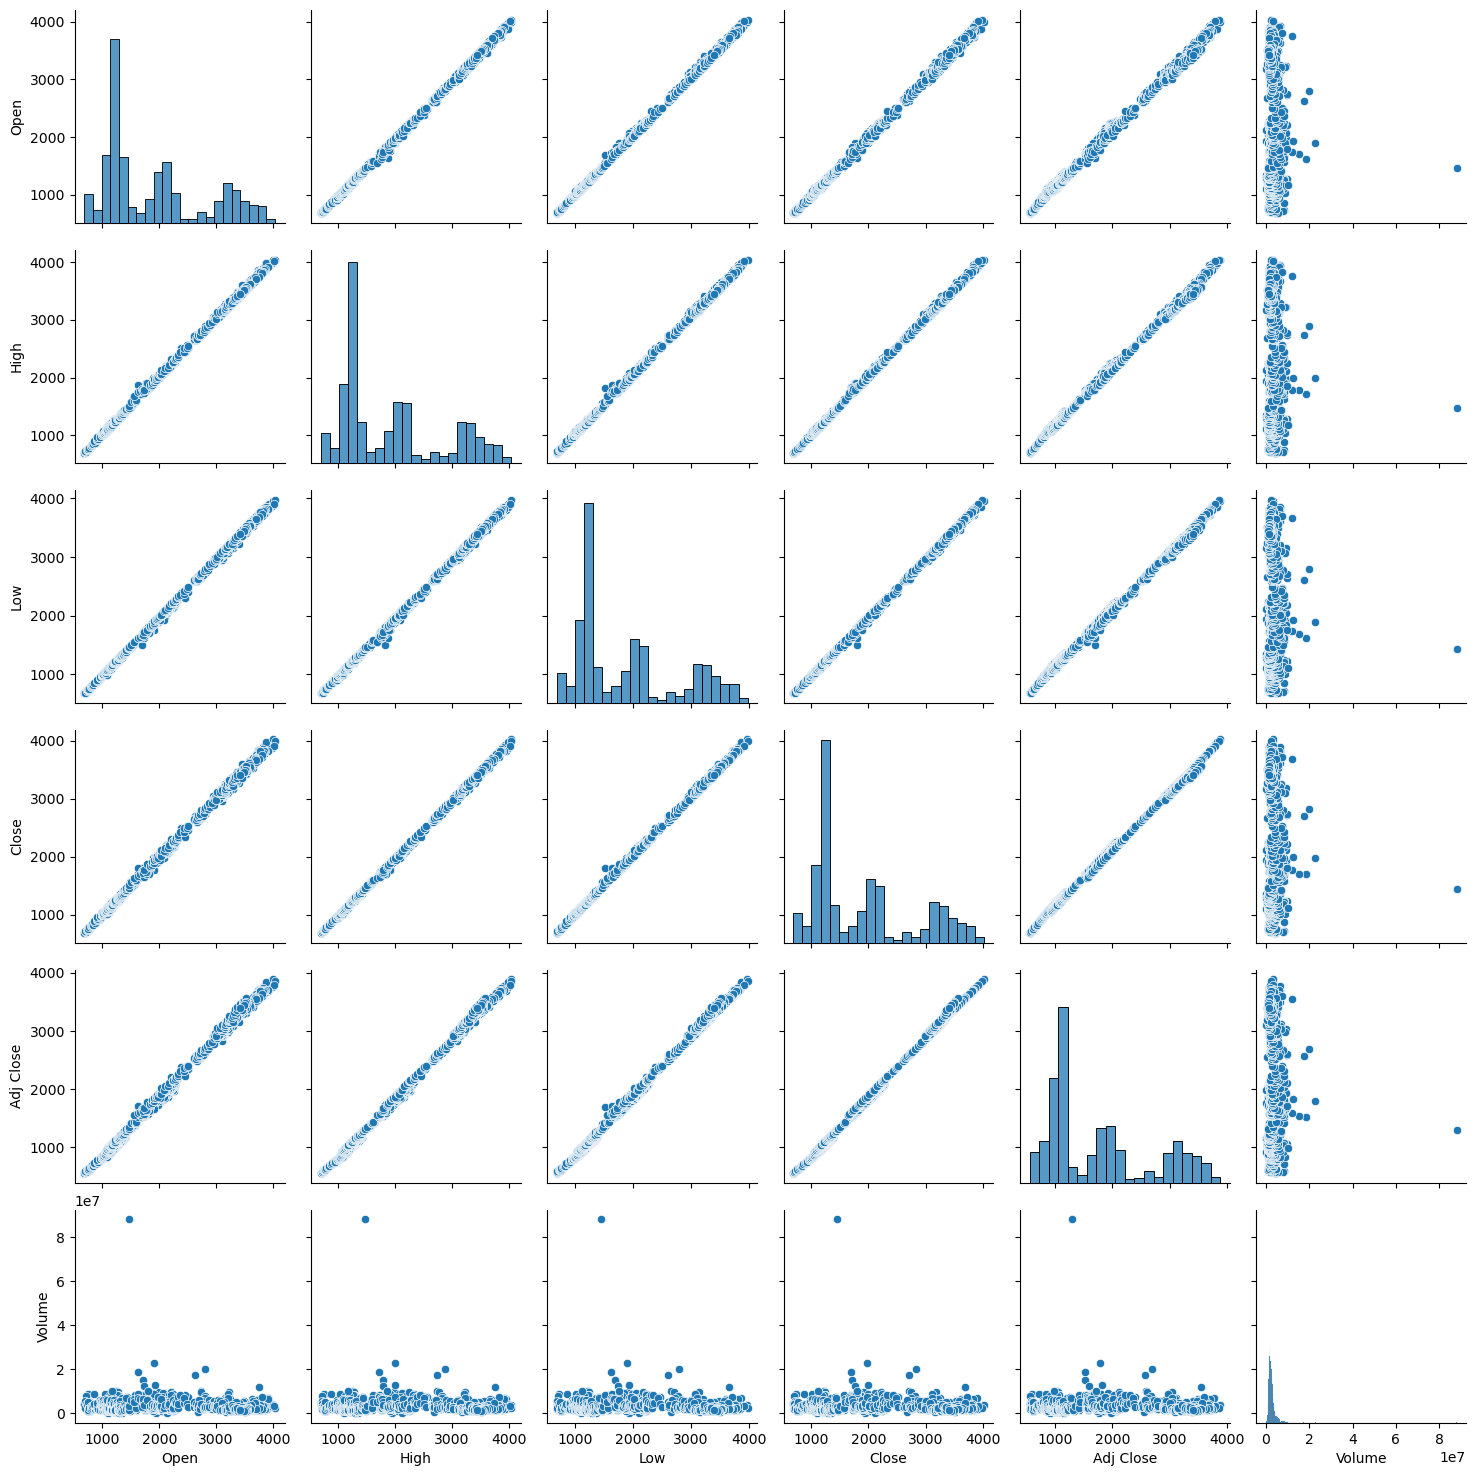

In [18]:
plt.rcParams["figure.figsize"]=(15,10)
sns.pairplot(df)

<AxesSubplot:>

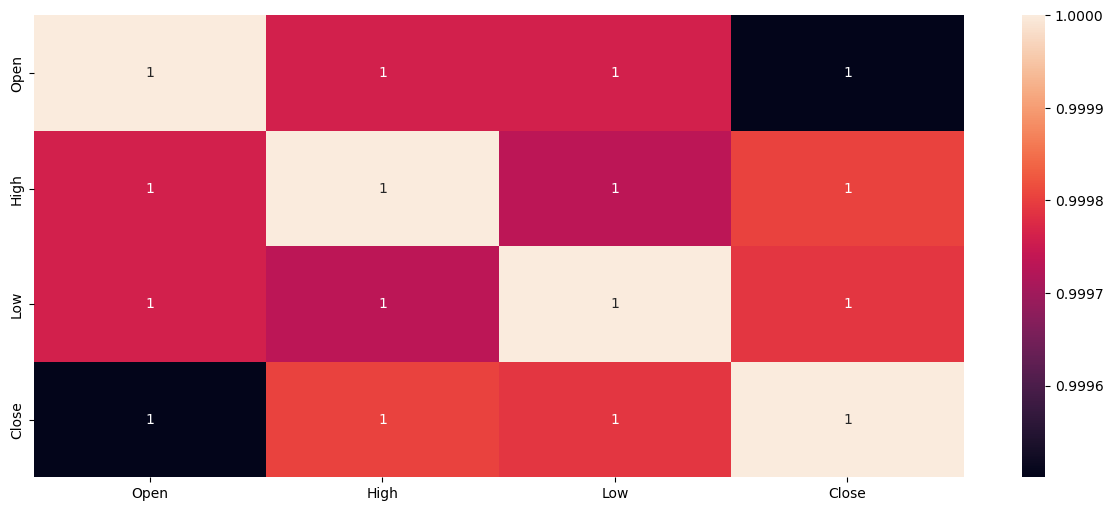

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(df2.corr(),annot=True)

In [20]:
#### candlestick plot

In [21]:
import plotly.graph_objects as go

In [22]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df2['Open'],
                high=df2['High'],
                low=df2['Low'],
                close=df2['Close'])])
fig.show()

# Opening price of the stock when the market opens

<AxesSubplot:>

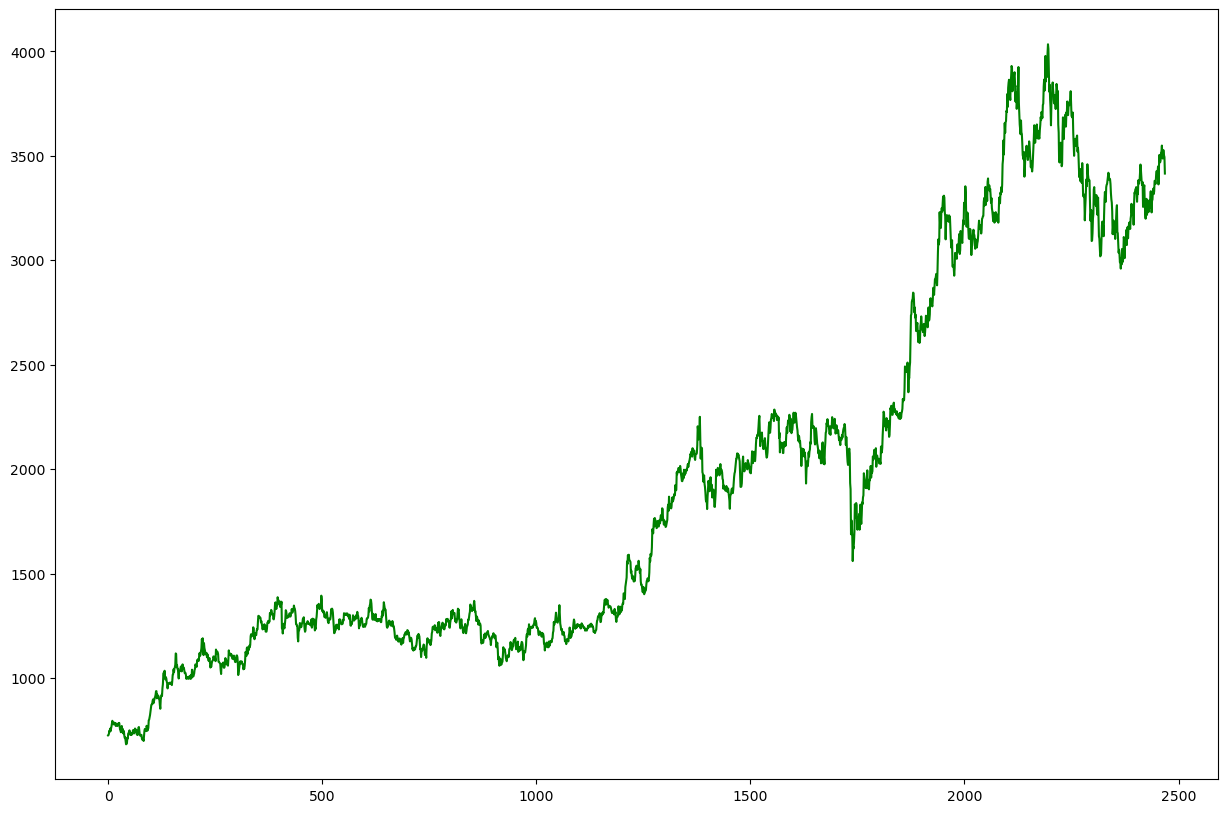

In [23]:
df2['Open'].plot(kind='line',color='green')

# Closing price of the stock when the market closed

<AxesSubplot:>

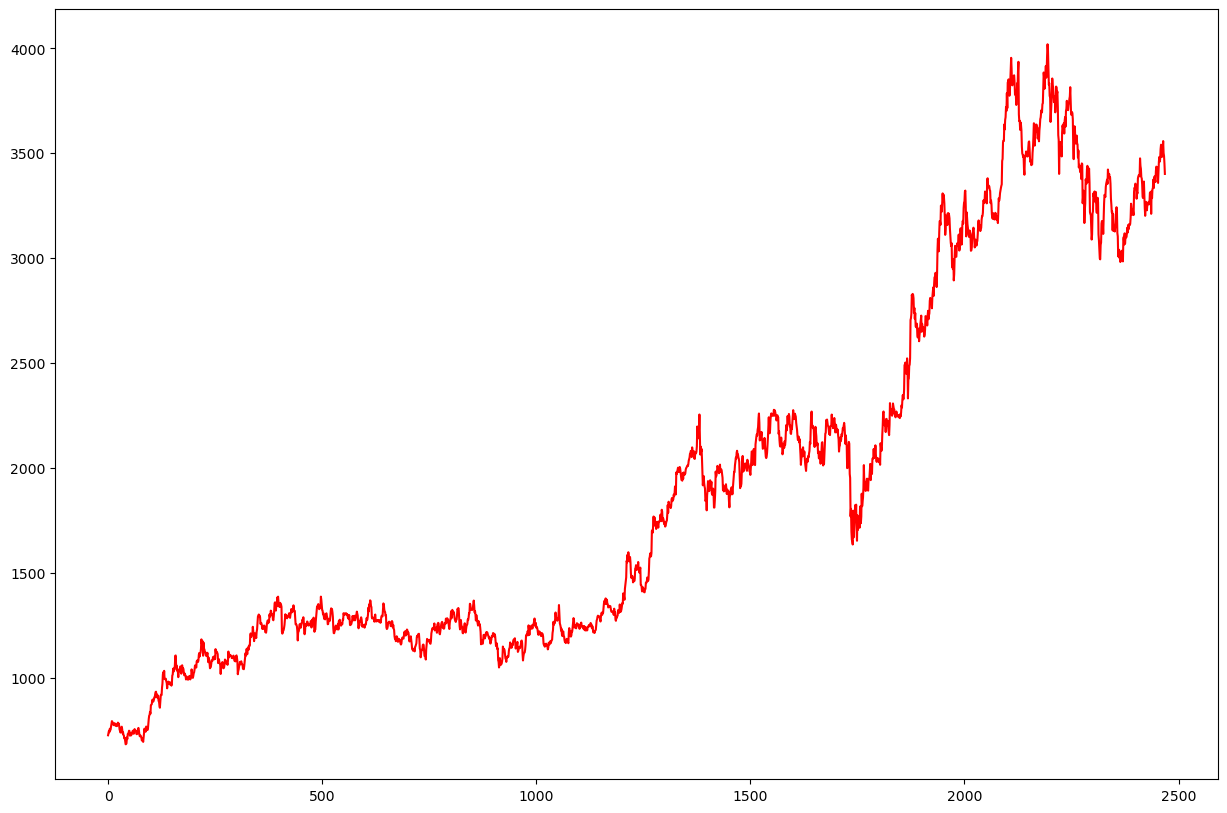

In [24]:
df2['Close'].plot(kind='line',color='Red')

In [25]:
#### moving average

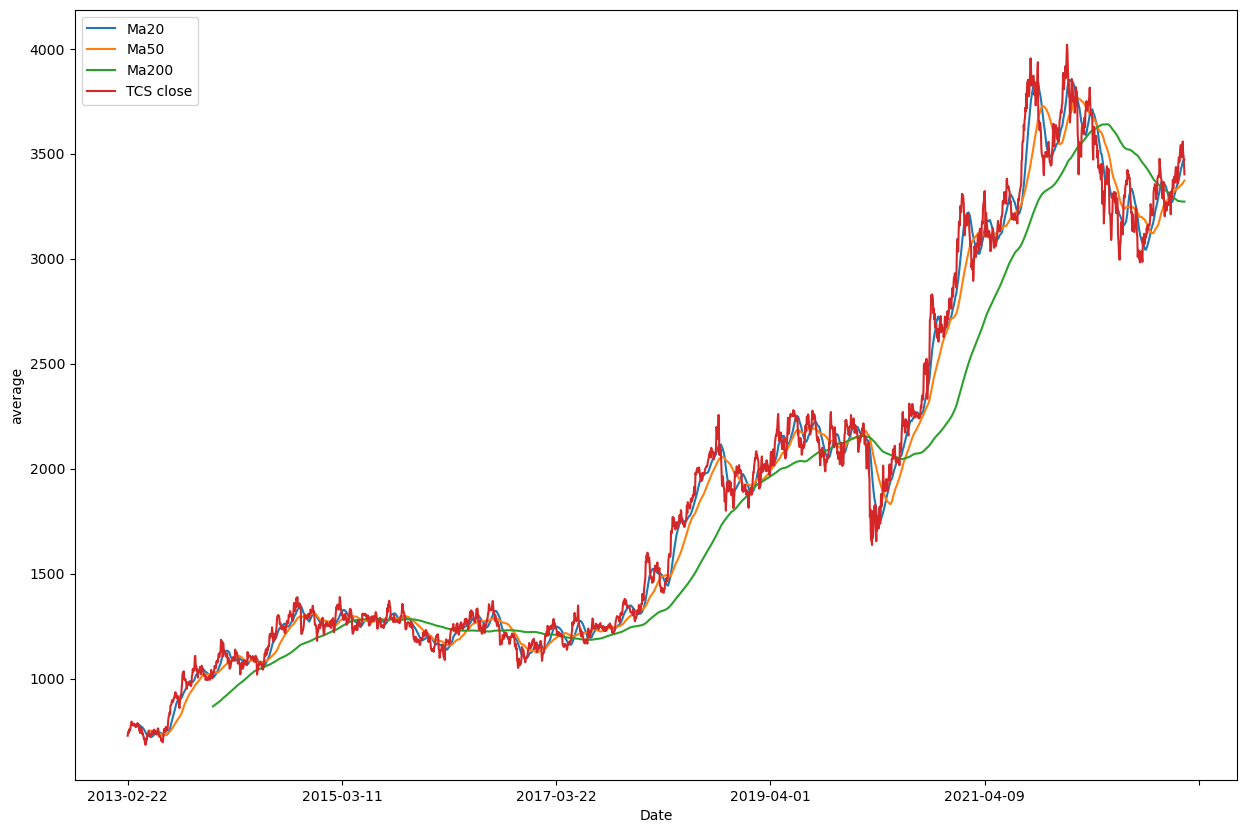

In [26]:
Ma=pd.DataFrame()
Ma['20']=df2['Close'].rolling(20).mean()
Ma['50']=df2['Close'].rolling(50).mean()
Ma['200']=df2['Close'].rolling(200).mean()
Ma['Date']=df['Date']
Ma['Close']=df2['Close']
Ma=Ma.set_index('Date')
label=['Ma20','Ma50','Ma200','TCS close']
Ma.plot()
plt.ylabel('average')
plt.legend(label,loc='upper left')

In [27]:
#### Standard Scaler

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler=MinMaxScaler()
df3=scaler.fit_transform(df2)

In [30]:
df3

array([[0.01268108, 0.01223897, 0.01172101, 0.0128581 ],
       [0.01312865, 0.01387232, 0.013116  , 0.01564714],
       [0.01521729, 0.01759397, 0.01531463, 0.01905098],
       ...,
       [0.84127767, 0.84457041, 0.84686885, 0.84049967],
       [0.83889064, 0.84066226, 0.83768006, 0.82961338],
       [0.81530382, 0.8221957 , 0.82259287, 0.81478348]])

In [31]:
df4=pd.DataFrame(df3,columns=['Open','High','Low','Close',])

In [32]:
df4

Open      High       Low     Close
0     0.012681  0.012239  0.011721  0.012858
1     0.013129  0.013872  0.013116  0.015647
2     0.015217  0.017594  0.015315  0.019051
3     0.019432  0.018056  0.017028  0.017072
4     0.018089  0.021331  0.018234  0.022140
...        ...       ...       ...       ...
2462  0.848797  0.860382  0.862623  0.861717
2463  0.848483  0.849612  0.851403  0.844653
2464  0.841278  0.844570  0.846869  0.840500
2465  0.838891  0.840662  0.837680  0.829613
2466  0.815304  0.822196  0.822593  0.814783

[2467 rows x 4 columns]

In [33]:
#### stationarity

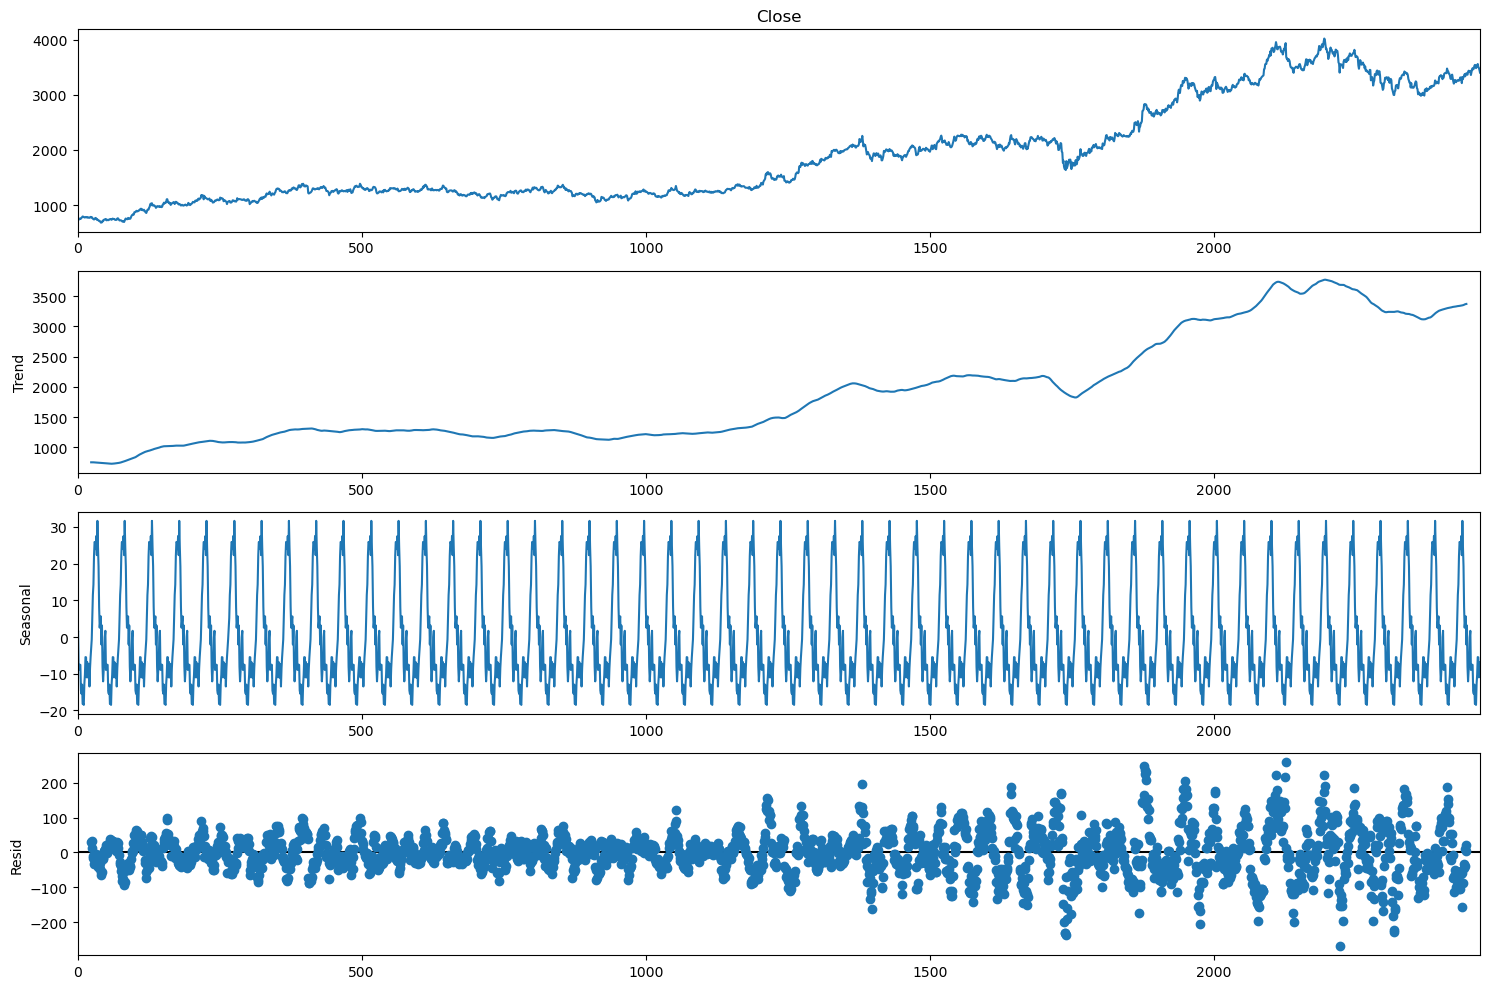

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df2.Close,period =48)
decompose_ts_add.plot()
plt.show()

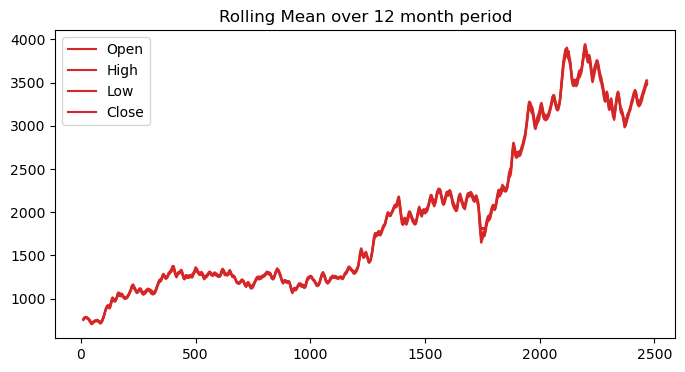

In [35]:
df2.rolling(window = 12).mean().plot(figsize=(8,4), color="tab:red", title="Rolling Mean over 12 month period");

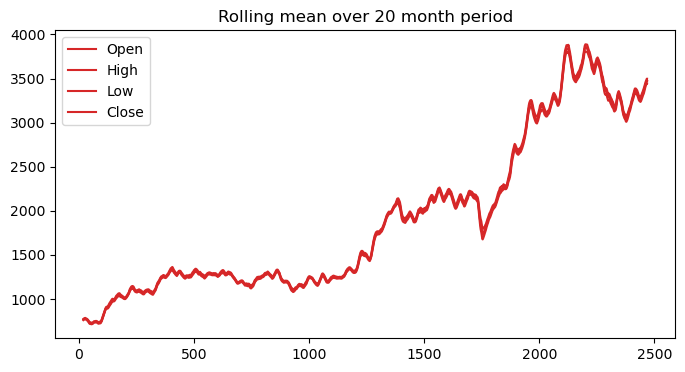

In [36]:
df2.rolling(window = 20).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean over 20 month period");

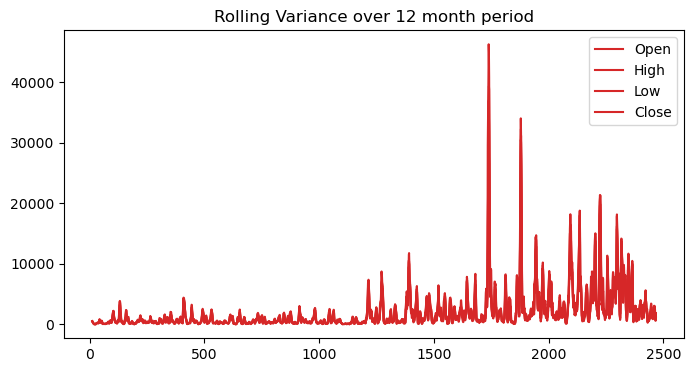

In [37]:
df2.rolling(window = 12).var().plot(figsize=(8,4), color="tab:red", title="Rolling Variance over 12 month period");

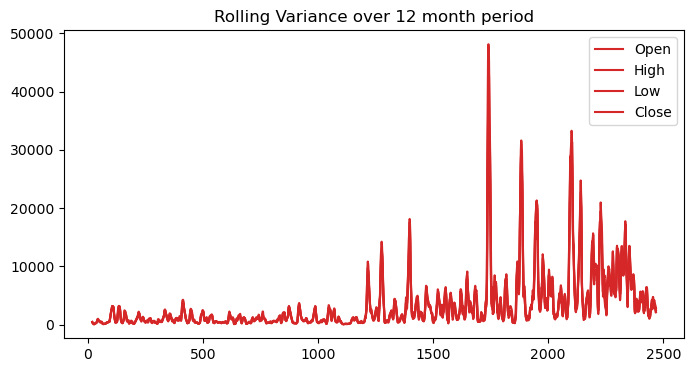

In [38]:
df2.rolling(window = 20).var().plot(figsize=(8,4), color="tab:red", title="Rolling Variance over 12 month period");

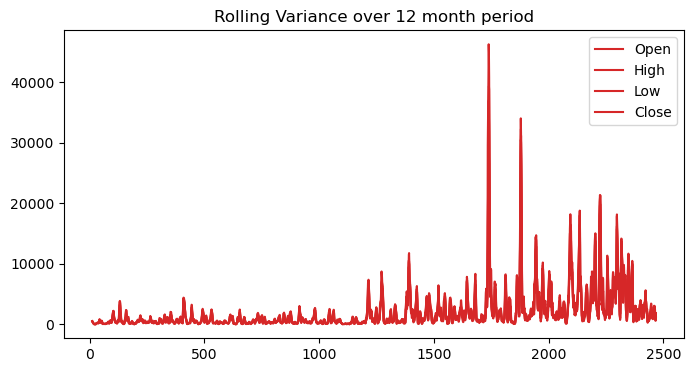

In [39]:
df2.rolling(window = 12).var().plot(figsize=(8,4), color="tab:red", title="Rolling Variance over 12 month period");

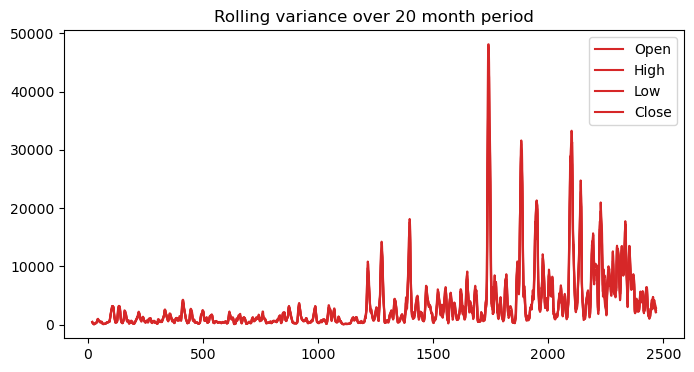

In [40]:
df2.rolling(window = 20).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance over 20 month period");

# High vs Low - TCS

<AxesSubplot:>

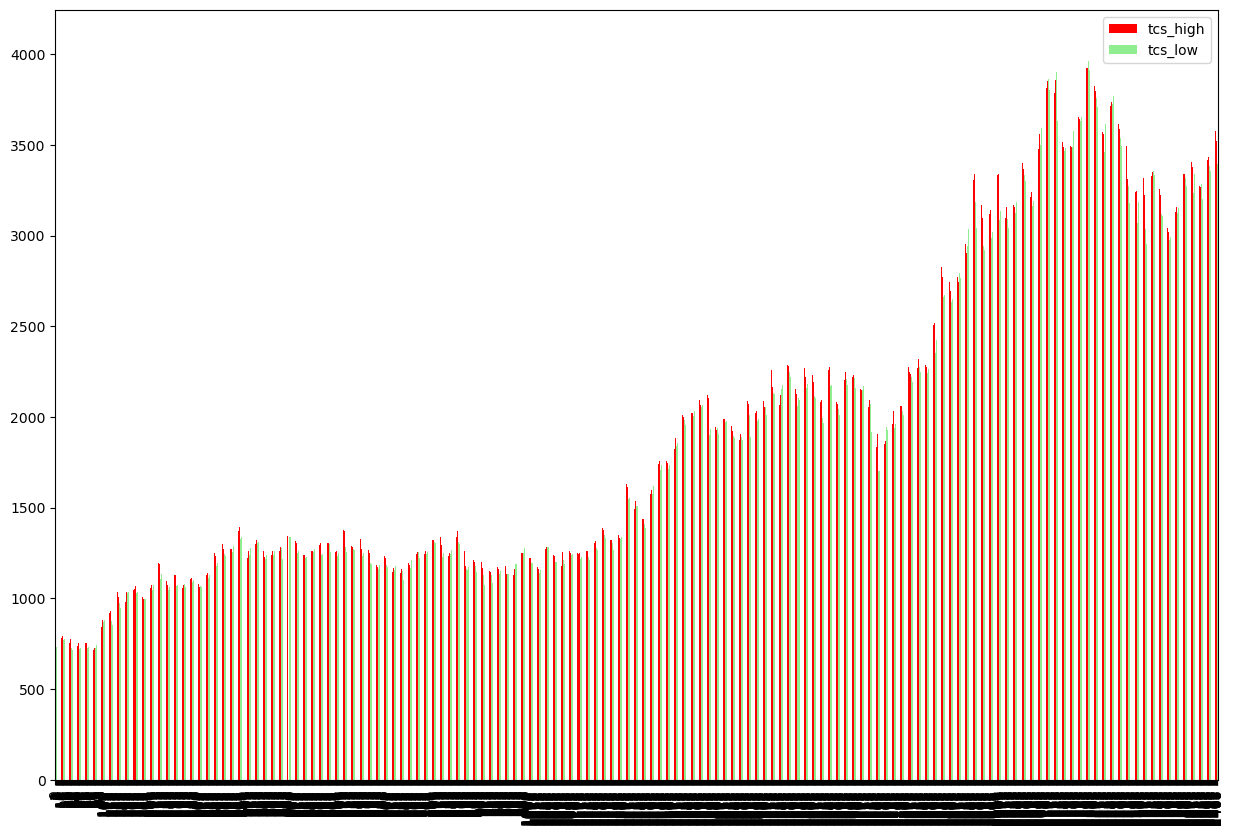

In [41]:

df3=pd.DataFrame()
df3["tcs_high"]=pd.Series(df.High)
df3["tcs_low"]=pd.Series(df.Low)


df3.plot(kind="bar",color=["red","lightgreen"])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



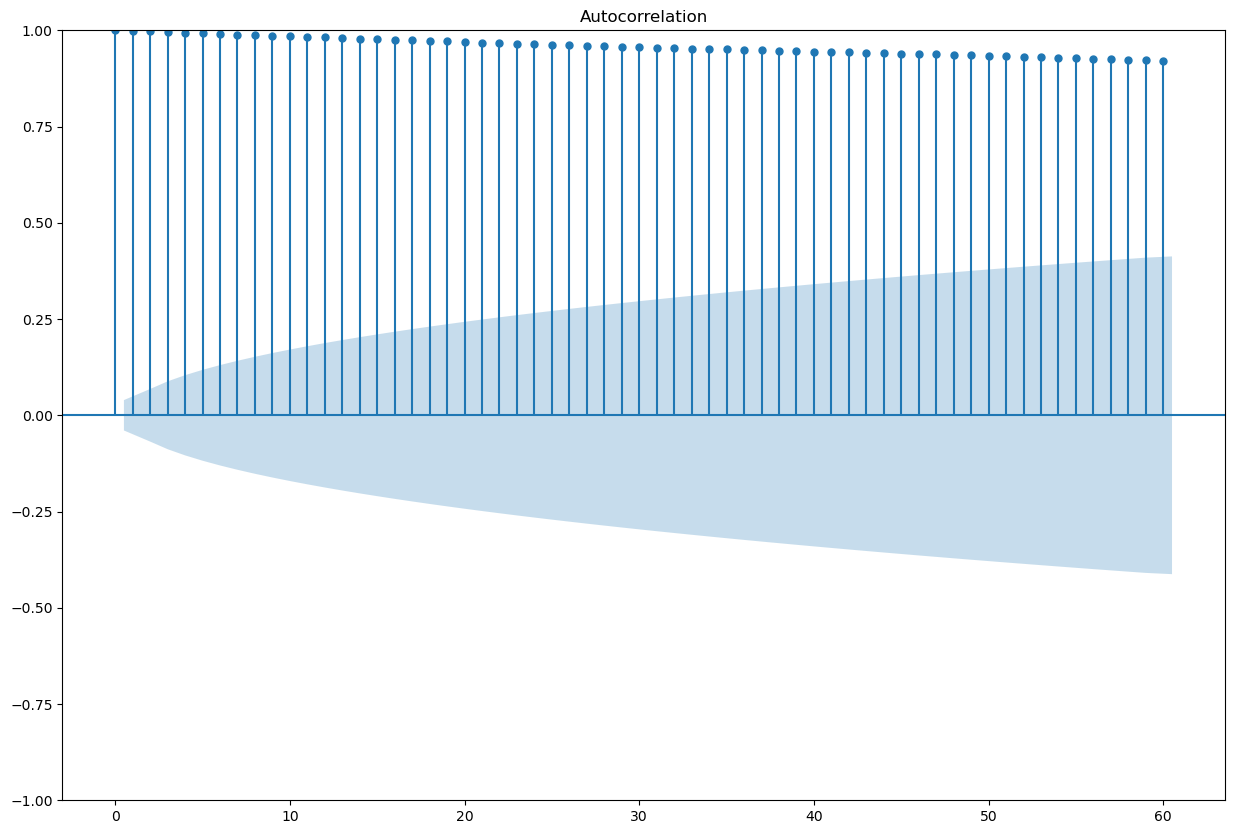

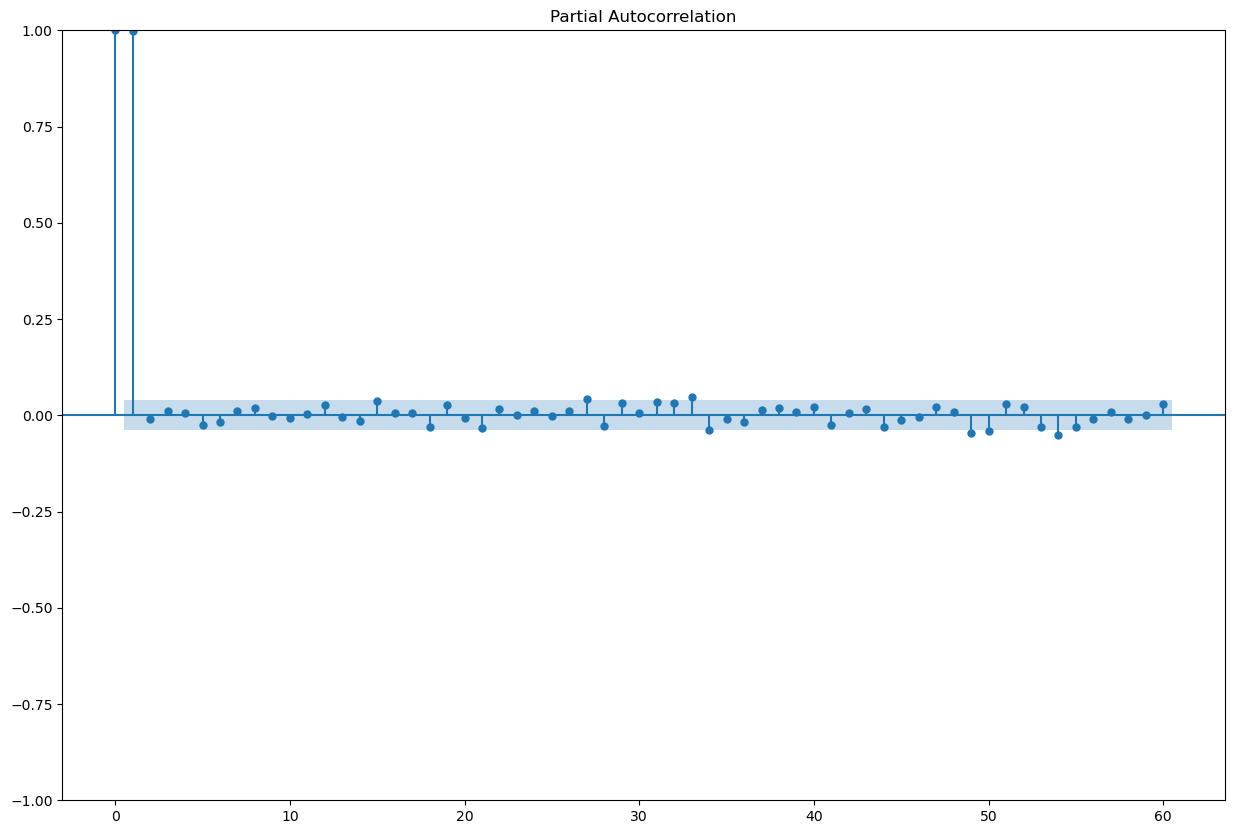

In [42]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df2.Close,lags=60)
tsa_plots.plot_pacf(df2.Close,lags=60)
plt.show()

In [43]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df2.Close, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -0.5479342838594607
2. P-Value :  0.882318200294917
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2461
5. Critical Values :
	 1% :  -3.4330099487687264
	 5% :  -2.8627151430515654
	 10% :  -2.5673955755408095


In [44]:
### REmove trend

In [45]:
###Logged Transformation:

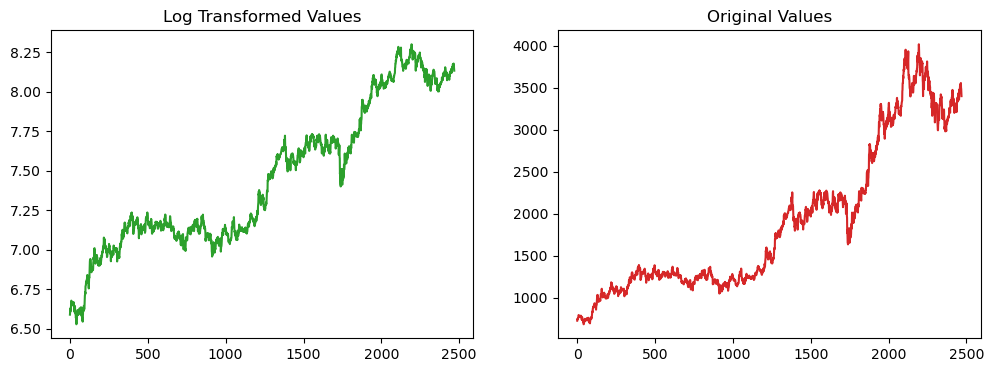

In [46]:
logged_close = df2["Close"].apply(lambda x : np.log(x))

ax1 = plt.subplot(121)
logged_close.plot(figsize=(12,4) ,color="tab:green", title="Log Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
df2.Close.plot(color="tab:red", title="Original Values", ax=ax2);

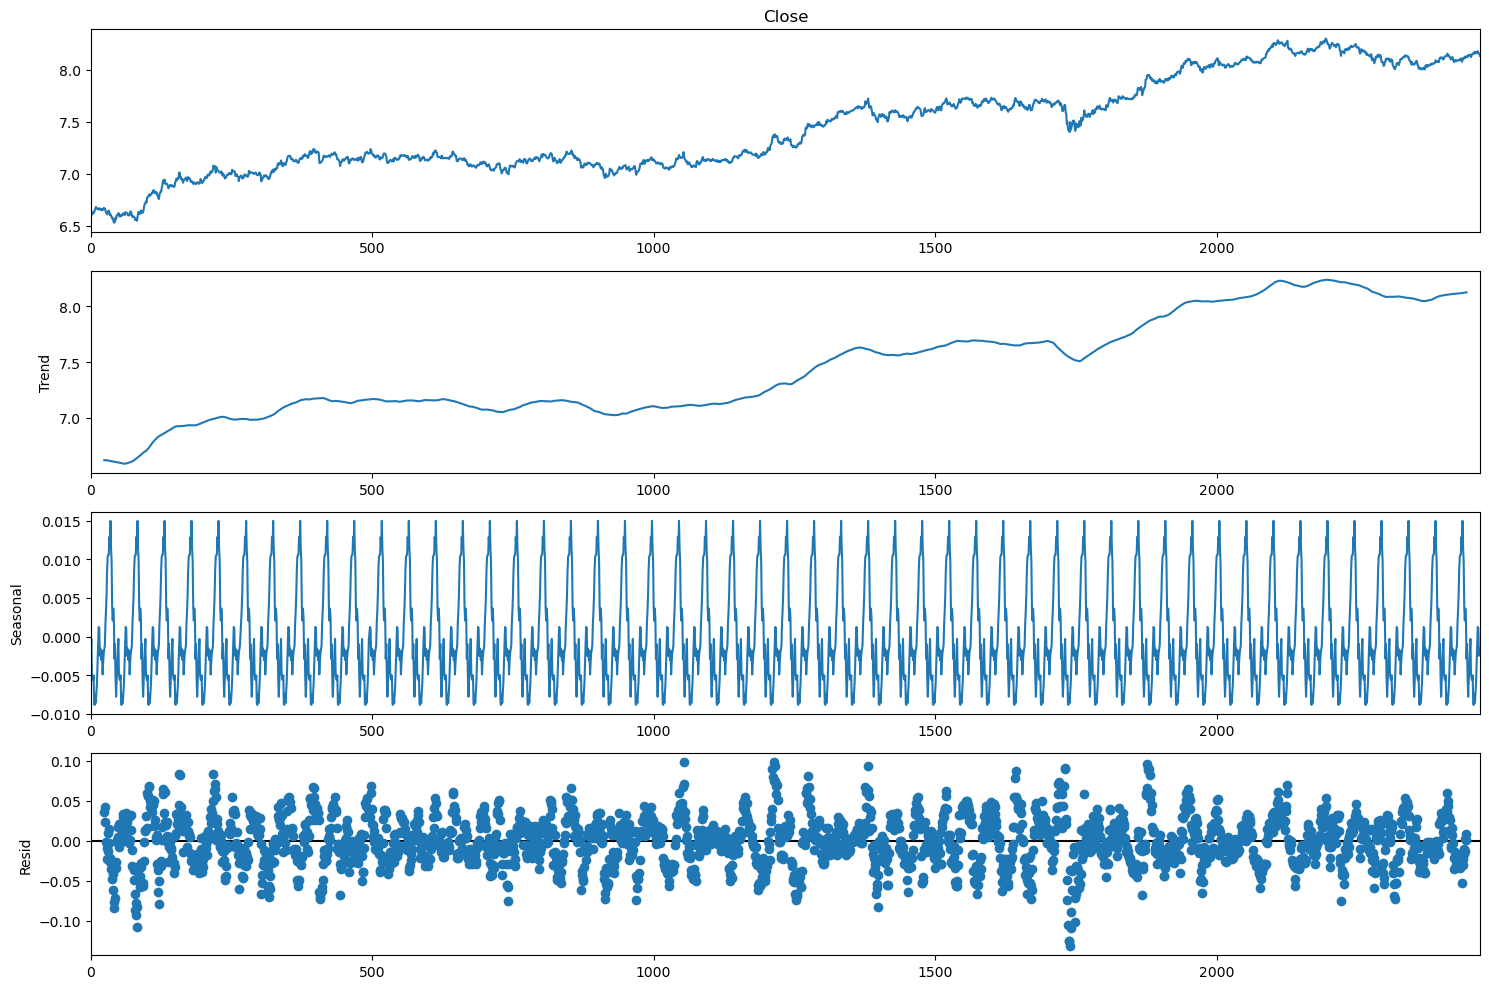

In [47]:
decompose_result = seasonal_decompose(logged_close.dropna(),period = 48)

decompose_result.plot();

In [48]:
#####Power Transformations:

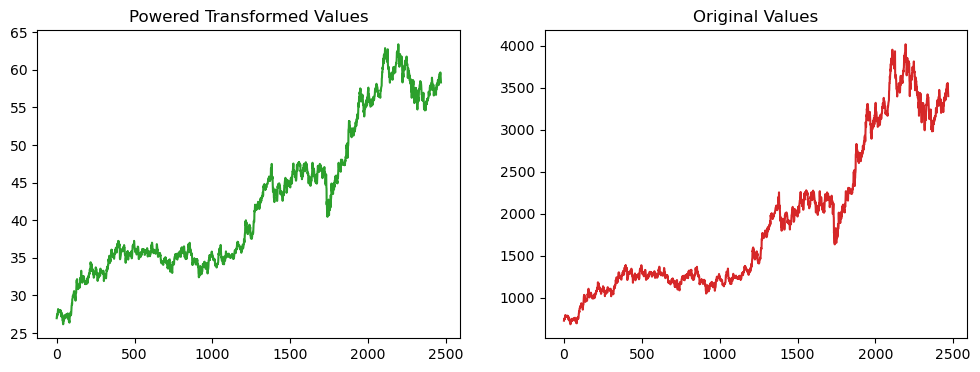

In [49]:
powered_Close= df2["Close"].apply(lambda x : x ** 0.5)

ax1 = plt.subplot(121)
powered_Close.plot(figsize=(12,4), color="tab:green", title="Powered Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
df2.Close.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

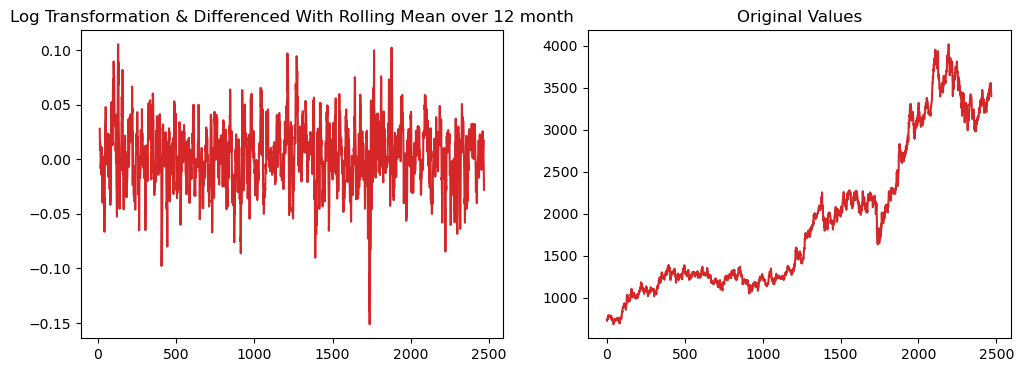

In [50]:
logged_close = pd.DataFrame(df2["Close"].apply(lambda x : np.log(x)))

rolling_mean = logged_close.rolling(window = 12).mean()
close_log_rolled_detrended = logged_close["Close"] - rolling_mean["Close"]


ax1 = plt.subplot(121)
close_log_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Log Transformation & Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
df2.Close.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

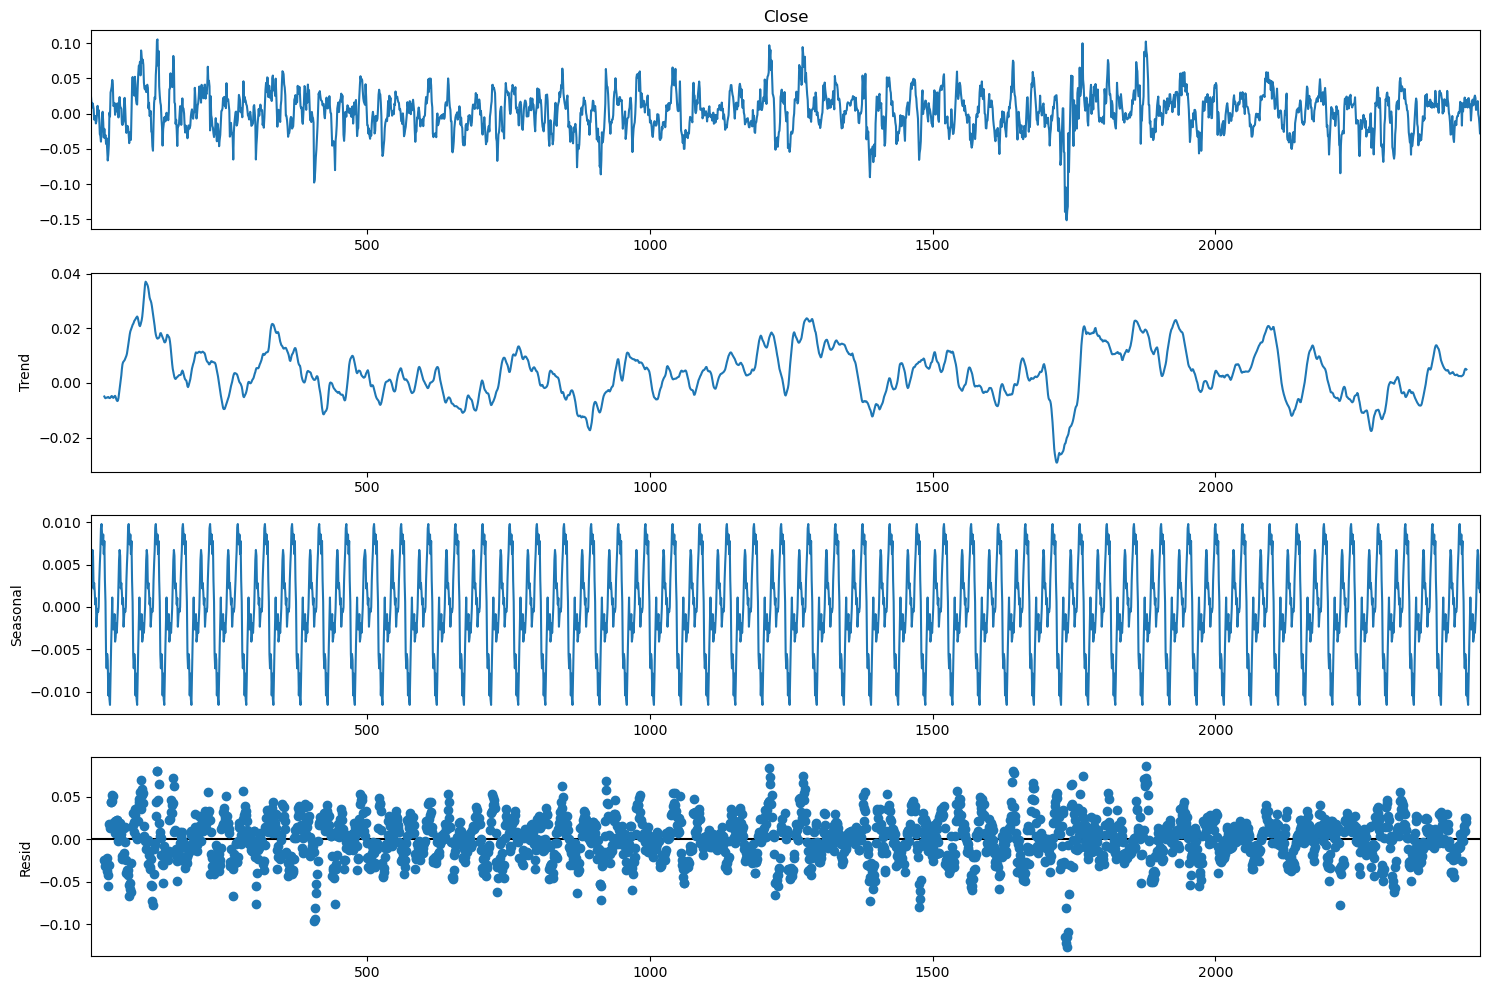

In [51]:
decompose_result = seasonal_decompose(close_log_rolled_detrended.dropna(),period = 48)

decompose_result.plot();

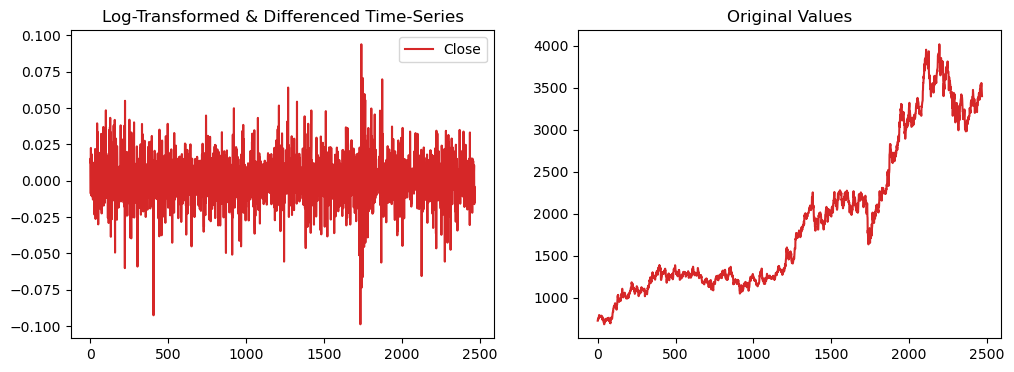

In [52]:
logged_close_diff = logged_close - logged_close.shift()

ax1 = plt.subplot(121)
logged_close_diff.plot(figsize=(12,4), color="tab:red", title="Log-Transformed & Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
df2.Close.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [53]:
dftest = adfuller(logged_close_diff.dropna()["Close"].values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -21.986767935687816
2. P-Value :  0.0
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2461
5. Critical Values :
	 1% :  -3.4330099487687264
	 5% :  -2.8627151430515654
	 10% :  -2.5673955755408095


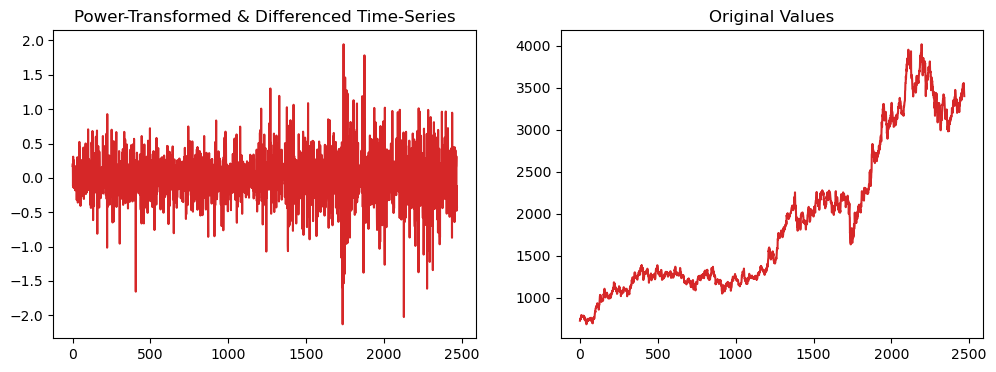

In [54]:
powered_close_diff = powered_Close - powered_Close.shift()

ax1 = plt.subplot(121)
powered_close_diff.plot(figsize=(12,4), color="tab:red", title="Power-Transformed & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
df2.Close.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [55]:
dftest = adfuller(powered_close_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -21.740644405253963
2. P-Value :  0.0
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2461
5. Critical Values :
	 1% :  -3.4330099487687264
	 5% :  -2.8627151430515654
	 10% :  -2.5673955755408095


In [56]:
#### Regression Model

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [58]:
X=df2[['Open','Low','High',]]
Y=df2['Close']

In [59]:
X

Open          Low         High
0      725.000000   721.150024   732.025024
1      726.500000   725.750000   737.500000
2      733.500000   733.000000   749.974976
3      747.625000   738.650024   751.525024
4      743.125000   742.625000   762.500000
...           ...          ...          ...
2464  3527.199951  3527.000000  3575.000000
2465  3526.149902  3490.000000  3538.899902
2466  3502.000000  3475.050049  3522.000000
2467  3494.000000  3444.750000  3508.899902
2468  3414.949951  3395.000000  3447.000000

[2467 rows x 3 columns]

In [60]:
Y

0        727.549988
1        736.849976
2        748.200012
3        741.599976
4        758.500000
           ...     
2464    3558.050049
2465    3501.149902
2466    3487.300049
2467    3451.000000
2468    3401.550049
Name: Close, Length: 2467, dtype: float64

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [62]:
model=LinearRegression()

In [63]:
model.fit(X_train,Y_train)

LinearRegression()

In [64]:
print(model.coef_)

[-0.57397575  0.72323796  0.84963749]


In [65]:
print(model.intercept_)

-0.0558576582434398


In [66]:
predicted=model.predict(X_test)

In [67]:
predicted

array([1105.78833428, 1324.96788456, 2070.8964853 , 2240.66432487,
        747.2237429 , 1344.51477729, 1484.7113113 , 1221.47305055,
       1741.3253812 , 1320.75916442, 1337.92555452, 3712.57828509,
       1258.68072979, 1878.28496326, 1270.46568803, 2006.95311293,
       1373.52187326, 1110.87368   , 2098.33542728, 1275.10376735,
       1251.84587531, 3052.72545287, 1284.23258027, 3216.12898499,
       1255.57638263, 2171.91744515, 1753.1120558 , 2695.28049975,
       3371.19871673, 3375.77643315, 3317.81528173, 3333.39612731,
       2077.47449169,  699.8329126 , 3709.36809839,  767.56057053,
       3810.17283968, 3710.8322313 , 2824.495865  , 2213.5775291 ,
       1377.59465055, 3111.38776591, 2264.9850671 , 1227.41404733,
       2257.70301365, 1202.37539781, 1812.63895061, 1887.00176142,
       1333.66764014, 2036.02548676, 3134.20284284, 1777.06900291,
       3877.15881111, 1125.26189652, 1216.60365544, 3242.80965256,
       1212.06438795, 3836.82116284, 1347.00707106, 1015.54015

In [68]:
predicted.shape

(741,)

In [69]:
dframe=pd.DataFrame(Y_test,predicted)

In [70]:
dfr=pd.DataFrame({'Actual':Y_test,'predicted p':predicted})

In [71]:
dfr

Actual  predicted p
292   1104.224976  1105.788334
1199  1328.550049  1324.967885
1367  2079.850098  2070.896485
1564  2237.649902  2240.664325
65     749.224976   747.223743
...           ...          ...
475   1241.025024  1252.161458
2237  3700.949951  3685.414755
62     757.049988   753.194718
92     752.450012   758.007965
2353  3169.649902  3170.766323

[741 rows x 2 columns]

In [72]:
model.score(X_test,Y_test)

0.9998369102488975

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn.metrics as metrics

In [74]:
import math

In [75]:
print('MAe:',metrics.mean_absolute_error(Y_test,predicted))

MAe: 7.577054053420612


In [76]:
print('MSe:',metrics.mean_squared_error(Y_test,predicted))

MSe: 128.8895124008806


In [77]:
print('RMe:',math.sqrt(metrics.mean_squared_error(Y_test,predicted)))

RMe: 11.352951704331371


In [78]:
graph=dfr.head(20)

<AxesSubplot:>

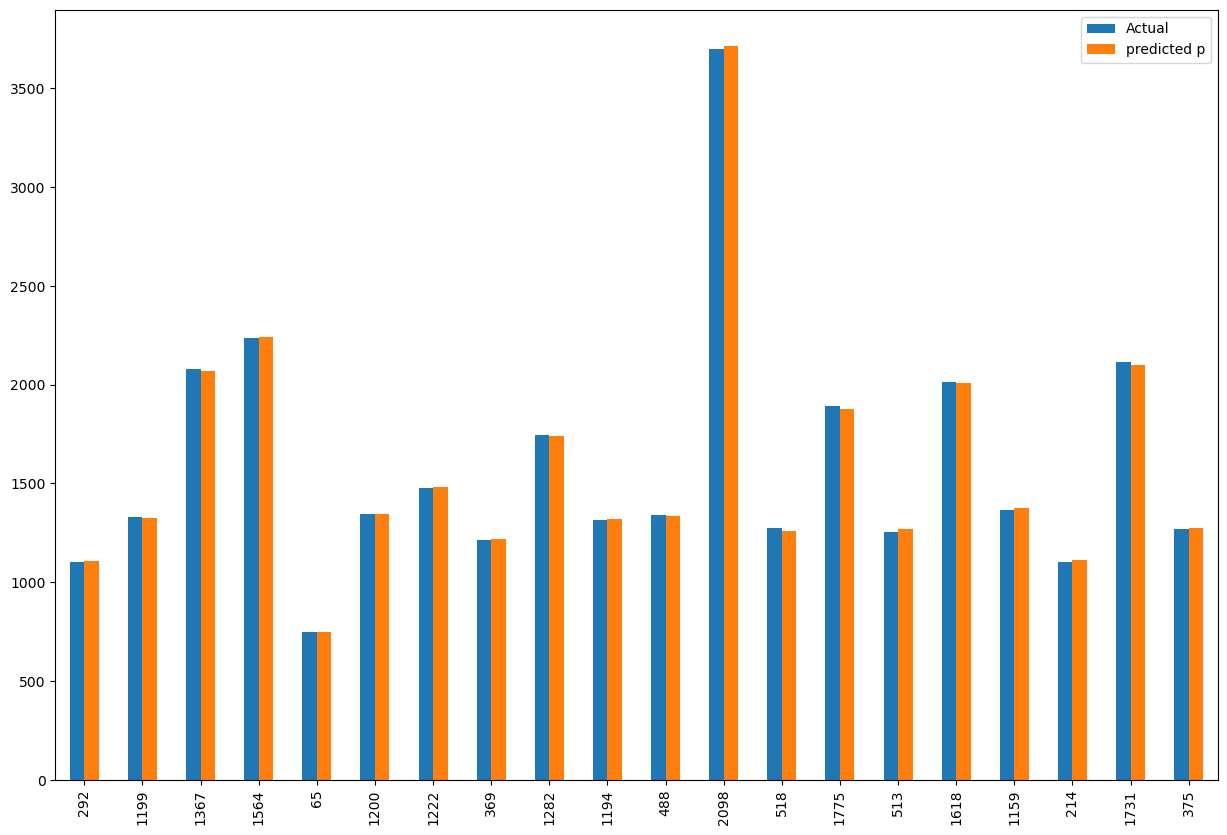

In [79]:
graph.plot(kind='bar')

In [80]:
#Mean Absolute Percentage Error


In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

In [82]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [83]:
df2.shape

(2467, 4)

In [84]:
Train=df2.head(2447)
Test=df2.tail(20)

In [85]:
# 1.Simple Exponential Smoothing

In [86]:
ses_model = SimpleExpSmoothing(Train["Close"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Close) 

2.6947897035402786

In [87]:
pred_ses

2449    3378.656986
2450    3378.656986
2451    3378.656986
2452    3378.656986
2453    3378.656986
2454    3378.656986
2455    3378.656986
2456    3378.656986
2457    3378.656986
2458    3378.656986
2459    3378.656986
2460    3378.656986
2461    3378.656986
2462    3378.656986
2463    3378.656986
2464    3378.656986
2465    3378.656986
2466    3378.656986
2467    3378.656986
2468    3378.656986
dtype: float64

In [88]:
# 2. Advance Exponential Smoothing ( HOLT )

In [89]:
hw_model = Holt(Train["Close"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Close) 

3.8784495741225387

In [90]:
pred_hw

2449    3473.902378
2450    3487.727162
2451    3501.551946
2452    3515.376730
2453    3529.201514
2454    3543.026298
2455    3556.851082
2456    3570.675866
2457    3584.500651
2458    3598.325435
2459    3612.150219
2460    3625.975003
2461    3639.799787
2462    3653.624571
2463    3667.449355
2464    3681.274139
2465    3695.098923
2466    3708.923708
2467    3722.748492
2468    3736.573276
dtype: float64

In [91]:
# 3. Holt's winter additive trend and aditive sesonality

In [92]:
hwe_model_add_add = ExponentialSmoothing(Train["Close"],seasonal="add",trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Close)

1.286883831079891

In [93]:
pred_hwe_add_add

2449    3445.992318
2450    3442.323860
2451    3443.988674
2452    3443.052556
2453    3447.642399
2454    3441.385792
2455    3443.201377
2456    3442.838649
2457    3442.221264
2458    3447.411916
2459    3456.203739
2460    3459.210678
2461    3457.236714
2462    3453.568256
2463    3455.233070
2464    3454.296952
2465    3458.886795
2466    3452.630188
2467    3454.445773
2468    3454.083045
dtype: float64

In [94]:
# 4. Holt's winter additive trend and multiplicative sesonality

In [95]:
hwe_model_mul_add = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Close)

1.1906146173182466

In [96]:
pred_hwe_mul_add

2449    3471.431888
2450    3456.410312
2451    3459.957245
2452    3467.779946
2453    3480.463109
2454    3468.661688
2455    3463.471236
2456    3466.896394
2457    3457.847222
2458    3448.696270
2459    3464.476213
2460    3474.819564
2461    3486.431912
2462    3471.340052
2463    3474.896929
2464    3482.748021
2465    3495.480527
2466    3483.622806
2467    3478.404599
2468    3481.839156
dtype: float64

In [97]:
### Final Model by combining train and test

In [98]:
hwe_model_add_add = ExponentialSmoothing(df2["Close"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit()

In [99]:
hwe_model_add_add.forecast(10)

2467    3400.879747
2468    3405.653718
2469    3396.452570
2470    3387.980865
2471    3398.279832
2472    3411.063924
2473    3424.438282
2474    3408.818702
2475    3411.908710
2476    3421.342173
dtype: float64

<AxesSubplot:>

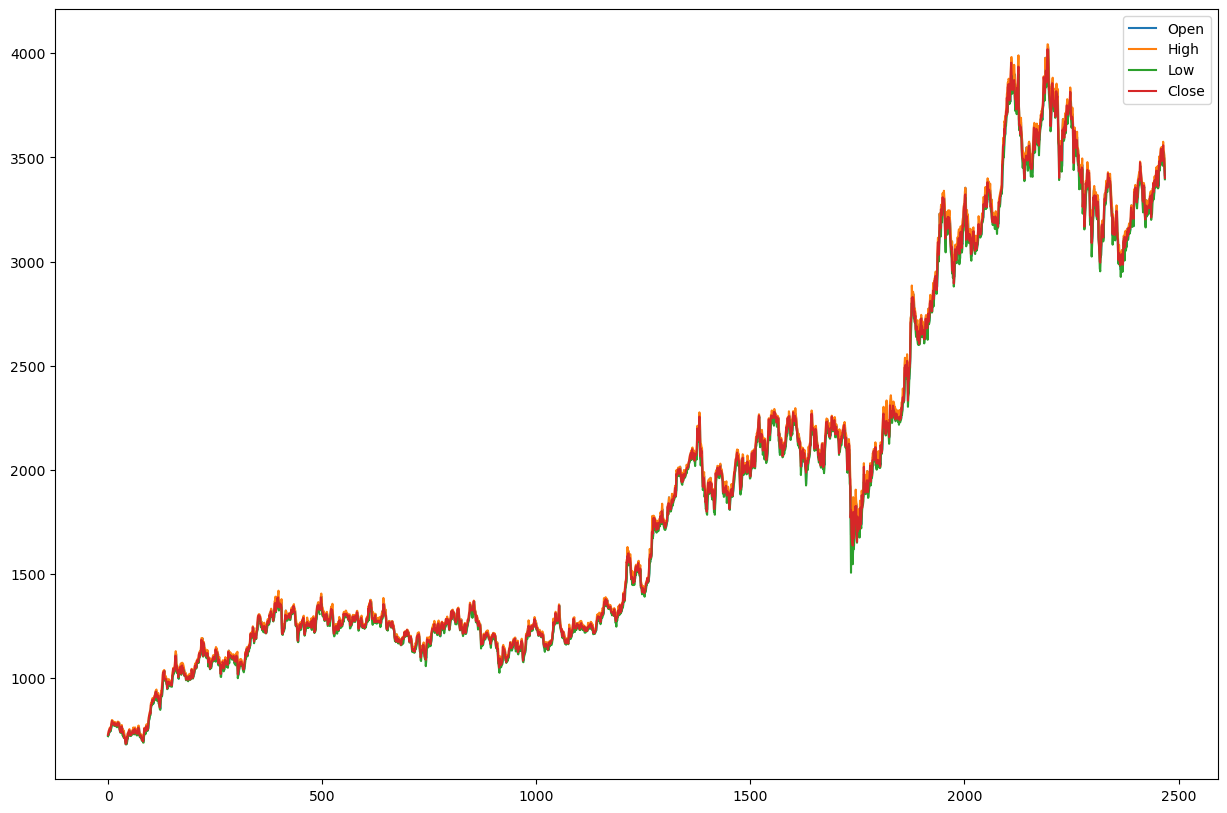

In [100]:
df1.plot()

In [101]:
from statsmodels.tsa.ar_model import AutoReg

In [102]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [103]:
test_result=adfuller(df2['Close'])

In [104]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
    

In [105]:
adfuller_test(df2['Close'])

ADF Test Statistic : -0.5479342838594607
p-value : 0.882318200294917
#Lags Used : 5
Number of Observations Used : 2461
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [106]:
df2['Close First Difference'] = df2['Close'] - df2['Close'].shift(1)

In [107]:

df2['Close'].shift(1)

0               NaN
1        727.549988
2        736.849976
3        748.200012
4        741.599976
           ...     
2464    3520.649902
2465    3558.050049
2466    3501.149902
2467    3487.300049
2468    3451.000000
Name: Close, Length: 2467, dtype: float64

In [108]:
df2['Seasonal First Difference']=df2['Close']-df2['Close'].shift(12)

In [109]:

df2.head(14)

Open        High         Low       Close  Close First Difference  \
0   725.000000  732.025024  721.150024  727.549988                     NaN   
1   726.500000  737.500000  725.750000  736.849976                9.299988   
2   733.500000  749.974976  733.000000  748.200012               11.350036   
3   747.625000  751.525024  738.650024  741.599976               -6.600036   
4   743.125000  762.500000  742.625000  758.500000               16.900024   
5   757.549988  758.000000  749.000000  750.924988               -7.575012   
6   745.500000  759.950012  745.500000  756.599976                5.674988   
7   758.500000  771.500000  754.299988  770.075012               13.475036   
8   768.075012  782.750000  768.075012  780.599976               10.524964   
9   780.500000  798.799988  779.674988  794.950012               14.350036   
10  795.000000  797.825012  787.450012  791.575012               -3.375000   
11  787.500000  794.775024  778.325012  783.099976               -8.475036   
12  779.000000  783.974976  774.000000  780.250000               -2.849976   
13  778.025024  779.349976  774.000000  775.849976               -4.400024   

    Seasonal First Difference  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  
5                         NaN  
6                         NaN  
7                         NaN  
8                         NaN  
9                         NaN  
10                        NaN  
11                        NaN  
12                  52.700012  
13                  39.000000

In [110]:
## Again test dickey fuller test
adfuller_test(df2['Seasonal First Difference'].dropna())

ADF Test Statistic : -9.469805600957143
p-value : 4.135429577618409e-16
#Lags Used : 27
Number of Observations Used : 2427
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

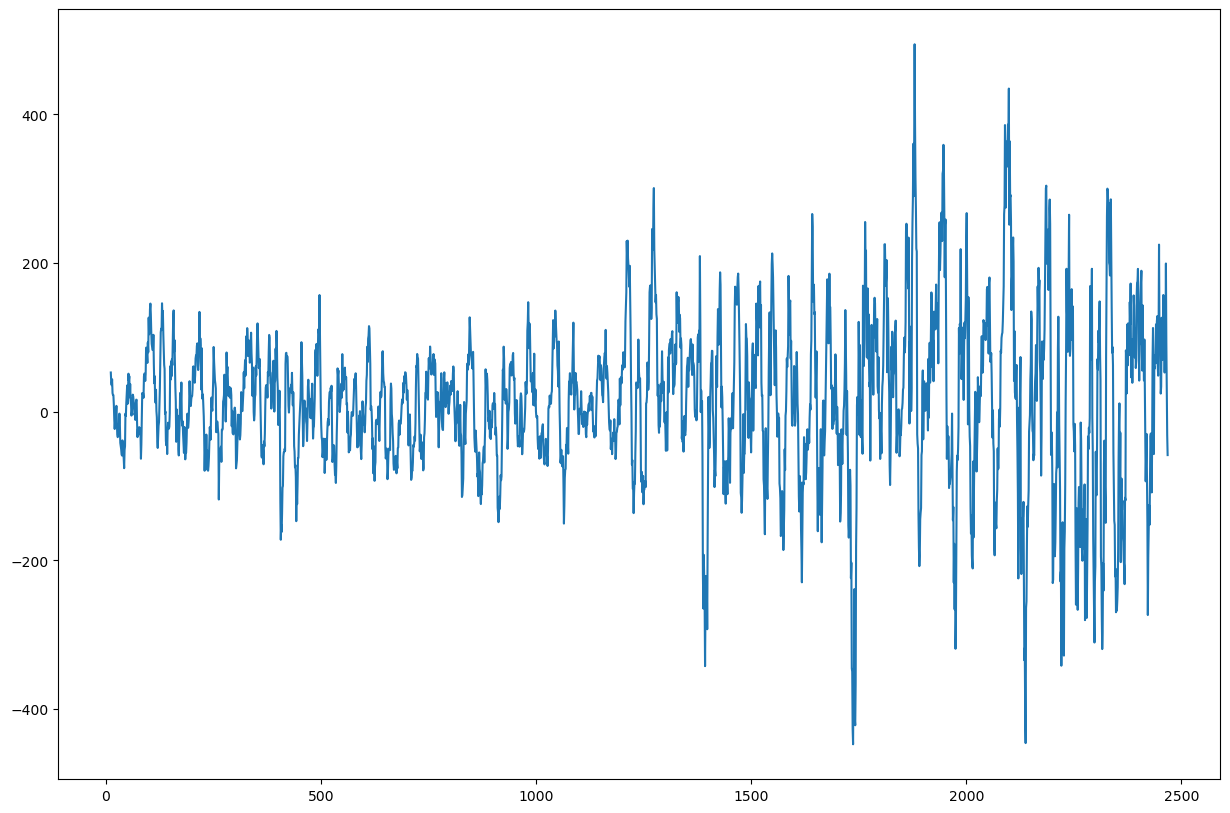

In [111]:
df2['Seasonal First Difference'].plot()

# Auto Regressive Model

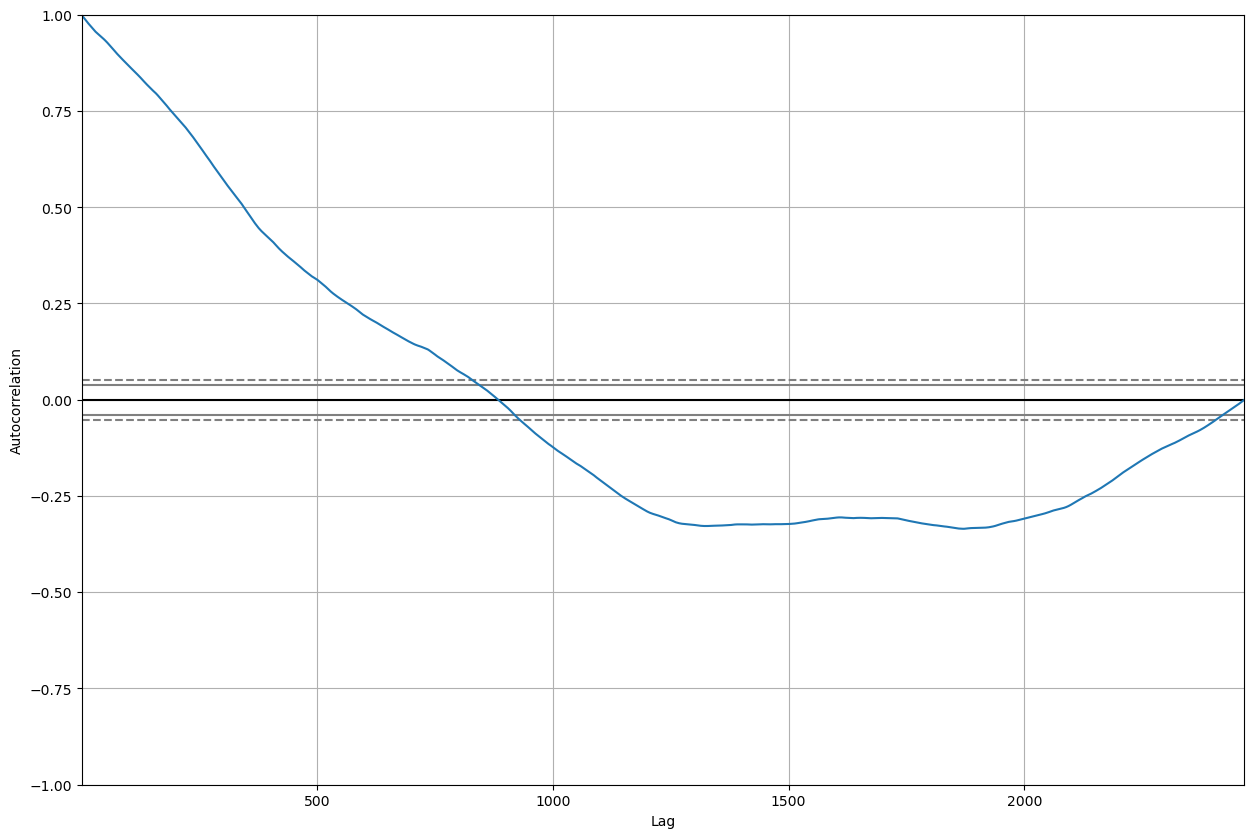

In [112]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2['Close'])
plt.show()

In [113]:
import statsmodels as sm
import statsmodels.graphics.tsaplots as tsa_plots

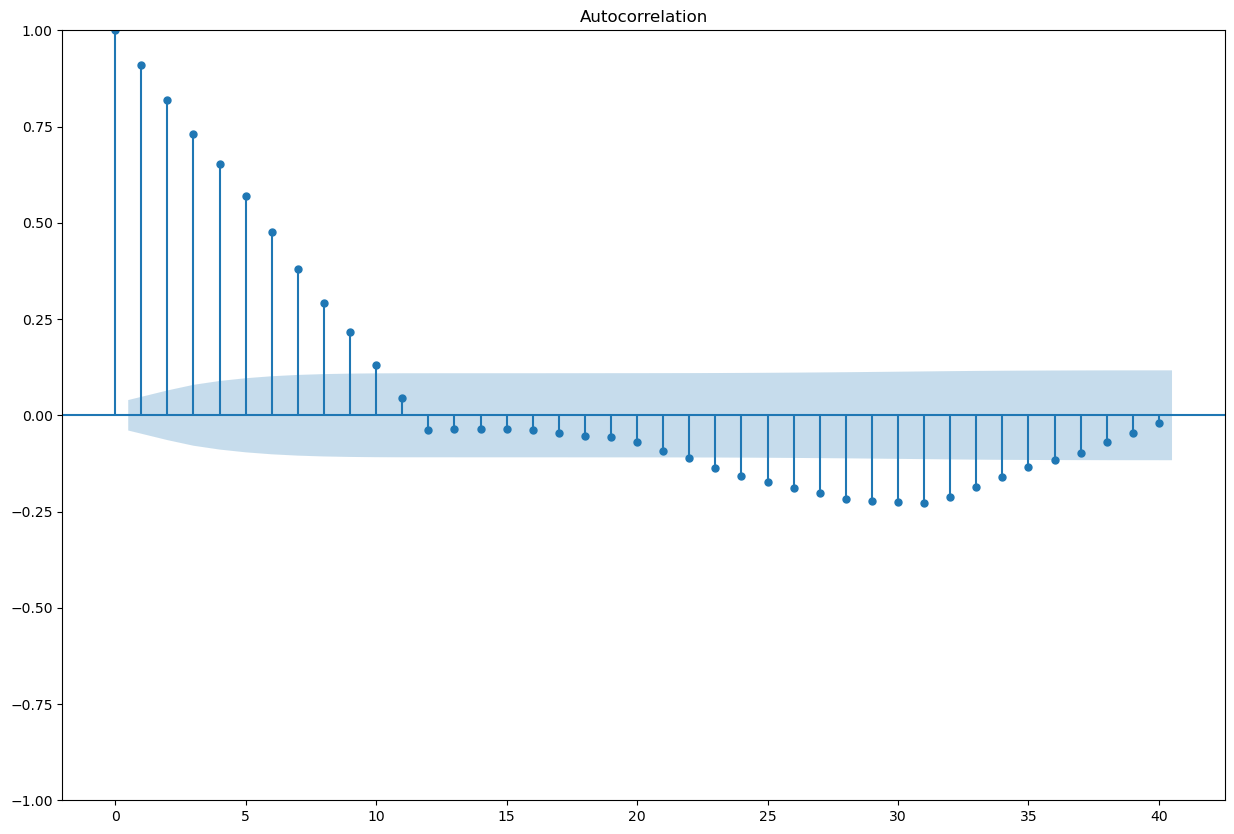

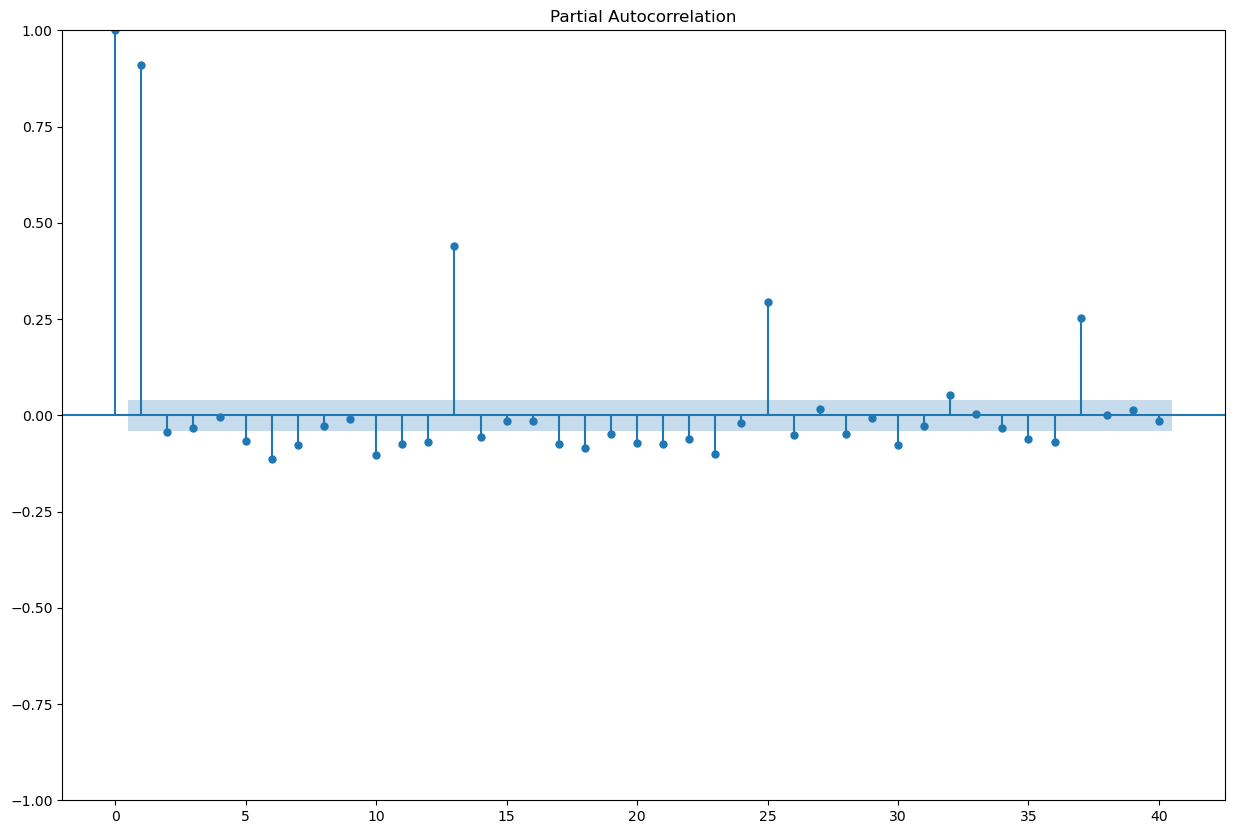

In [114]:

tsa_plots.plot_acf(df2['Seasonal First Difference'].iloc[13:],lags=40)

tsa_plots.plot_pacf(df2['Seasonal First Difference'].iloc[13:],lags=40)
plt.show()

In [115]:
# For non-seasonal data
#p=1, d=1, q=10
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [116]:
model=ARIMA(df2['Close'],order=(1,1,))
model_fit=model.fit()

In [117]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2467
Model:                 ARIMA(1, 1, 5)   Log Likelihood              -12015.338
Date:                Fri, 14 Apr 2023   AIC                          24044.676
Time:                        18:06:42   BIC                          24085.349
Sample:                             0   HQIC                         24059.453
                               - 2467                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0867      0.292     -0.297      0.767      -0.659       0.486
ma.L1          0.0746      0.291      0.257      0.797      -0.495       0.644
ma.L2         -0.0346      0.013     -2.601      0.009      -0.061      -0.009
ma.L3         -0.0235      0.018     -1.333      0.183      -0.058       0.011
ma.L4          0.0119      0.016      0.757      0.449      -0.019       0.043
ma.L5          0.0472      0.015      3.080      0.002       0.017       0.077
sigma2       998.9574     14.498     68.904      0.000     970.542    1027.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3691.88
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               7.09   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

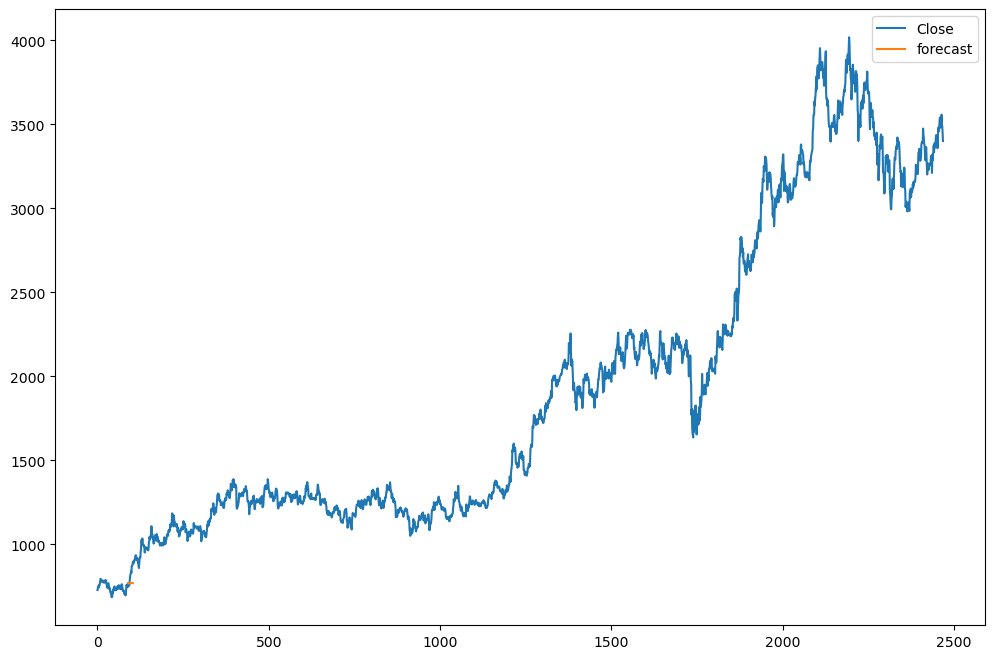

In [118]:
df2['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df2[['Close','forecast']].plot(figsize=(12,8))

In [119]:
import statsmodels.api as sm

In [120]:
model=sm.tsa.statespace.SARIMAX(df2['Close'],order=(1, 1, 6),seasonal_order=(1,1,1,15))
results=model.fit()

<AxesSubplot:>

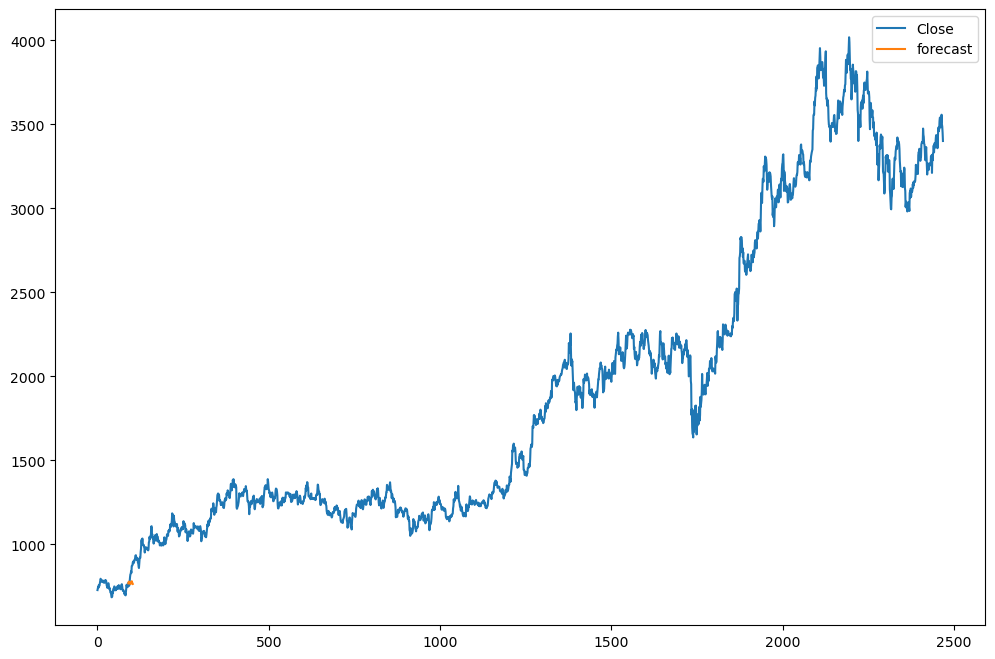

In [121]:
df1['forecast']=results.predict(start=90,end=103,dynamic=True)
df1[['Close','forecast']].plot(figsize=(12,8))